In [1]:
import numpy as np
import matplotlib.pyplot as plt

from highteacli.apiactions import API
api = API()

PROCESS = 'pp_ttx_13TeV'

In [2]:
import numpy as np

data = {
    #"contributions": [""],
    "extra_variables": {
        'm_{tt}':'sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2)'
    },
    'pdf': 'CT14nnlo',
    'muF': '20*muF0', 
    "binning": [
        {"variable": "m_{tt}" , "bins":list(np.linspace(0,800,11))}
    ]
}

request = api.request_hist(PROCESS, data)

In [3]:
res = api.wait_token_json(request['token'])

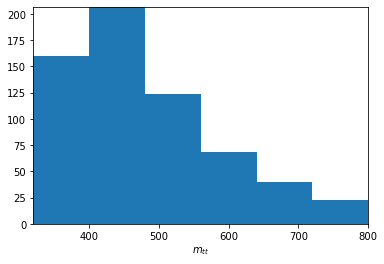

In [5]:
fig, ax = plt.subplots()

xmin = min(x[0][0][0] for x in res['mean'])
xmax = max(x[0][0][1] for x in res['mean'])

ymax = max(y[1] for y in res['mean'])

ax.set_xlim(xmin, xmax)
ax.set_ylim(0, ymax)

for i, ((xx,), y) in enumerate(res['mean']):
    x0 = xx[0]
    width = xx[1] - xx[0]
    rect = plt.Rectangle((x0,0), width, y, facecolor='C0')
    ax.add_patch(rect)
    ax.set_xlabel(f"${data['binning'][0]['variable']}$")
    #y_lo = res_lo['mean'][i][1]
    #rect_lo = plt.Rectangle((x0,0), width, y_lo, facecolor='C1')
    #ax.add_patch(rect_lo)
    